In [159]:
import numpy as np
from sklearn.neural_network import MLPRegressor
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [160]:
model = MLPRegressor(hidden_layer_sizes = (500,500,500), max_iter = 500)

In [161]:
for i in range(10):
    print(i)
    path = '../Data/fBmFieldANN/fields/training/batch_0'+str(i)+'/'
    y_train = np.loadtxt(path+'target.txt')
    X_train = []
    for j in range(10000):
        X = np.loadtxt(path+'2D_fBm_100_0'+str(i)+str(format(j,'04d'))+'.txt').flatten()
        X_train.append(X)
    X_train = np.asarray(X_train)
    model.partial_fit(X_train,y_train)
    print(model)

0
MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(500, 500, 500), learning_rate='constant',
       learning_rate_init=0.001, max_iter=500, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)
1
MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(500, 500, 500), learning_rate='constant',
       learning_rate_init=0.001, max_iter=500, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)
2
MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stoppi

In [162]:
import SpectralSynthesis as ss

In [163]:
N = 1000
N_p = 100
E = 2

In [164]:
H = np.random.random(N)
sigma = (3.0-0.1)*np.random.random(N)+0.1

In [165]:
y_test = np.zeros((N,2))
y_test[:,0] = H
y_test[:,1] = sigma
print(y_test)

[[ 0.9367748   0.63818968]
 [ 0.98567485  1.04461223]
 [ 0.82242087  0.46683817]
 ..., 
 [ 0.38499875  2.84394493]
 [ 0.76245836  0.64825698]
 [ 0.9791192   2.77246592]]


In [166]:
X_test = []
for i in range(N):
    X_test_i = ss.fBm(N_p,E,y_test[i,0],y_test[i,1]).flatten()
    X_test.append(X_test_i)
X_test = np.asarray(X_test)
np.save('../Data/fBmFieldANN/fields/testing/fields',X_test)
np.save('../Data/fBmFieldANN/fields/testing/targets',y_test)

C:\Users\C1764397\Workshop\PhD\Scripts\SpectralSynthesis.py:58: RuntimeWarning: divide by zero encountered in power
  rad = np.where(k>0.0,k**(-(beta*0.5)),0.0)


In [167]:
print(np.shape(X_train))

(10000, 10000)


In [168]:
print(len(X_train))

10000


In [169]:
print(np.shape(X_test))

(1000, 10000)


In [170]:
predictions = model.predict(X_test)
print(predictions)

[[  4.58829774e+00  -5.30580601e-01]
 [  1.04167703e+01  -1.08017471e-01]
 [  3.57365472e+00  -3.57975198e-01]
 ..., 
 [  1.43887592e+03   8.78488417e+02]
 [  4.37422600e+00  -4.78858741e-01]
 [  5.44929783e+02   4.56101715e+02]]


In [171]:
x_lin = np.linspace(np.amin(y_test[:,0]),np.amax(y_test[:,0]),100)
y_lin = x_lin

In [172]:
import NeuralNet as nn

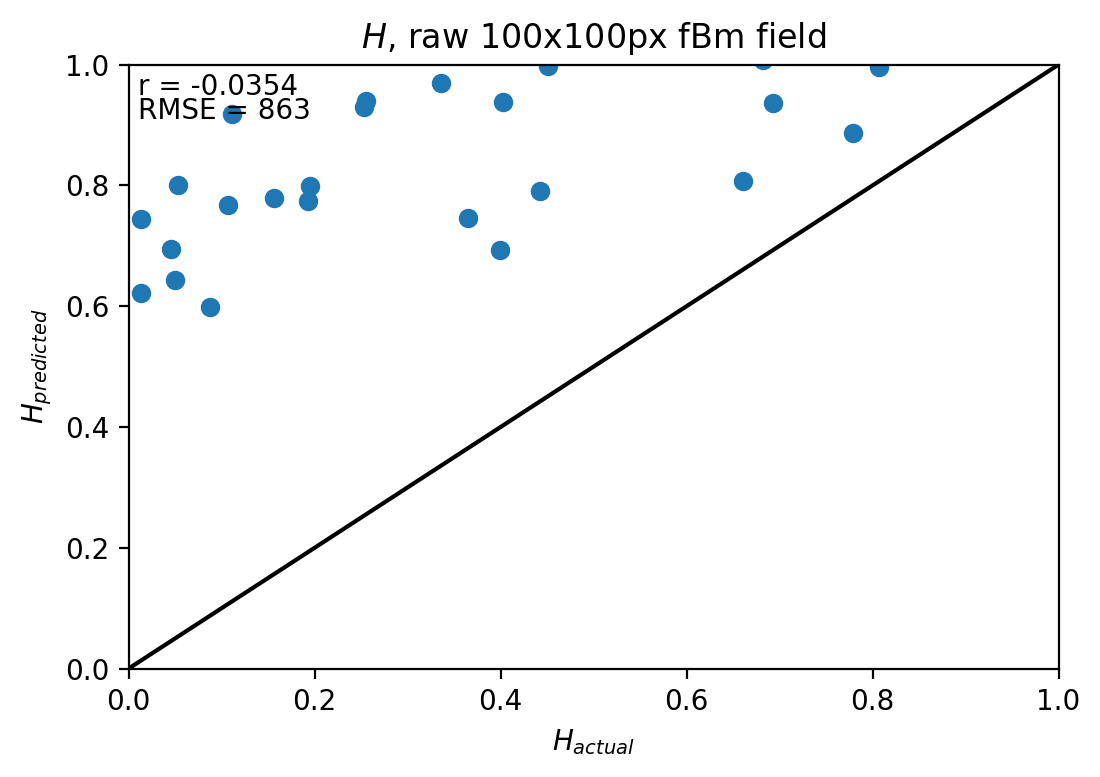

In [173]:
plt.figure(dpi = 200)
plt.scatter(y_test[:,0],predictions[:,0])
plt.text(0.01, 0.95, 'r = '+ '{:.3g}'.format(nn.Pearson(y_test[:,0],predictions[:,0])))
plt.text(0.01, 0.91, 'RMSE = '+ '{:.3g}'.format(nn.RMSE(y_test[:,0],predictions[:,0])))
plt.plot(x_lin,y_lin,c='k')
plt.ylim([0,1])
plt.xlim([0,1])
plt.xlabel(r'$H_{actual}$')
plt.ylabel(r'$H_{predicted}$')
plt.title(r'$H $, raw 100x100px fBm field')
plt.savefig('../Data/fBmFieldANN/results/H_score.png')

In [174]:
x_lin = np.linspace(np.amin(y_test[:,1]),np.amax(y_test[:,1]),100)
y_lin = x_lin

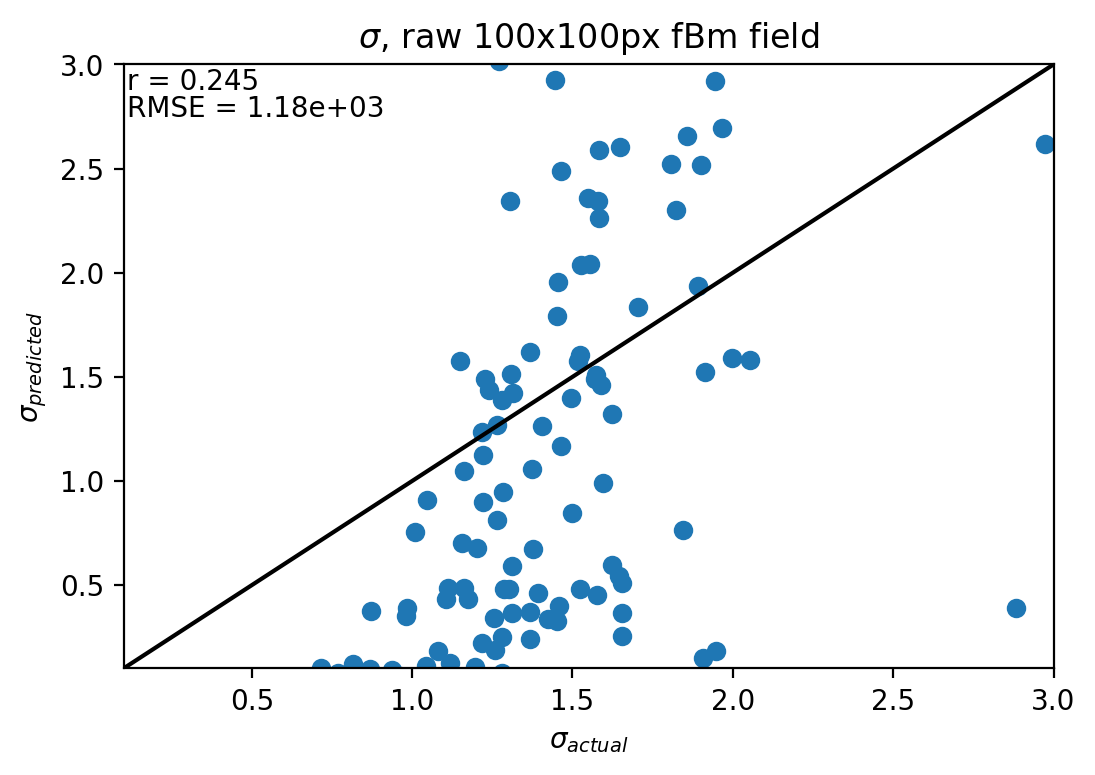

In [175]:
plt.figure(dpi=200)
plt.scatter(y_test[:,1],predictions[:,1])
plt.plot(x_lin,y_lin,c='k')
plt.text(0.11, 2.88, 'r = '+ '{:.3g}'.format(nn.Pearson(y_test[:,1],predictions[:,1])))
plt.text(0.11, 2.75, 'RMSE = '+ '{:.3g}'.format(nn.RMSE(y_test[:,1],predictions[:,1])))
plt.ylim([0.1,3])
plt.xlim([0.1,3])
plt.xlabel(r'$\sigma_{actual}$')
plt.ylabel(r'$\sigma_{predicted}$')
plt.title(r'$\sigma$, raw 100x100px fBm field')
plt.savefig('../Data/fBmFieldANN/results/sigma_score.png')